🧠 LSTM Model Summary:


C:\Users\Gangadhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 26)                  │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,939 (11.48 KB)

 Trainable params: 2,939 (11.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2955 - mae: 0.4478 - val_loss: 0.0747 - val_mae: 0.2427
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0601 - mae: 0.2092 - val_loss: 0.0485 - val_mae: 0.2016
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - mae: 0.1847 - val_loss: 0.0437 - val_mae: 0.1874
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mae: 0.1709 - val_loss: 0.0321 - val_mae: 0.1622
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mae: 0.1496 - val_loss: 0.0253 - val_mae: 0.1421
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mae: 0.1243 - val_loss: 0.0135 - val_mae: 0.1015
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0111 - mae: 0.0889 - val_loss: 0.0038 - val_mae: 0.0498
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mae: 0.0444 - val_loss: 0.0025 - val_mae: 0.0409
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mae

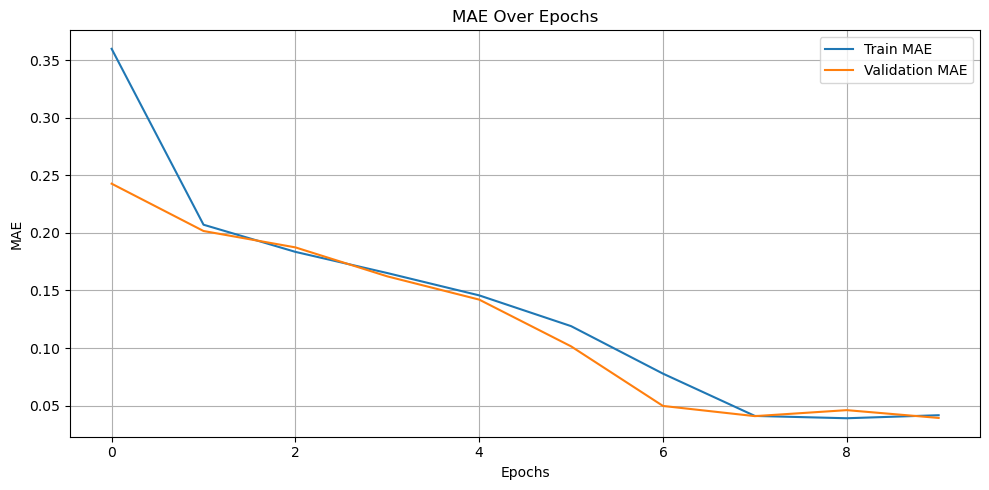

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate dummy time series data (replace with your dataset if needed)
data = np.sin(np.linspace(0, 100, 1000)) + np.random.normal(0, 0.1, 1000)
df = pd.DataFrame(data, columns=['value'])

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- Define model based on SID 2281544 ---
hidden_units = 4 * 4 + 10  # = 26
model = Sequential([
    LSTM(hidden_units, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary for screenshot
print("🧠 LSTM Model Summary:")
model.summary()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test data
y_pred = model.predict(X_test)

# Reverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Evaluate
test_mse = mean_squared_error(y_test_inv, y_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"\n📈 Final Test MSE: {test_mse:.4f}")
print(f"📉 Final Test MAE: {test_mae:.4f}")

# --- Plot MAE graph ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
